In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from intent_classification_helper import *

In [2]:
f = open('/content/drive/MyDrive/nlp_datasets/CLINC150/clinc150_uci/data_full.json')
data = json.load(f)

train_df = pd.DataFrame.from_dict(data['train'])
train_df.columns = ['message', 'intent']

val_df = pd.DataFrame.from_dict(data['val'])
val_df.columns = ['message', 'intent']

test_df = pd.DataFrame.from_dict(data['test'])
test_df.columns = ['message', 'intent']

print('number of intent classes in training set: ', len(set(train_df['intent'])))
print('number of intent classes in val set: ', len(set(val_df['intent'])))
print('number of intent classes in test set: ', len(set(test_df['intent'])))

number of intent classes in training set:  150
number of intent classes in val set:  150
number of intent classes in test set:  150


In [3]:
# encode label
le = LabelEncoder()
train_df['intent'] = le.fit_transform(train_df['intent'])
val_df['intent'] = le.fit_transform(val_df['intent'])
test_df['intent'] = le.fit_transform(test_df['intent'])

onehot_encoder = OneHotEncoder()
y_train = onehot_encoder.fit_transform(train_df['intent'].values.reshape(-1, 1)).todense()
y_val = onehot_encoder.fit_transform(val_df['intent'].values.reshape(-1, 1)).todense()
y_test = onehot_encoder.fit_transform(test_df['intent'].values.reshape(-1, 1)).todense()

# preprocess text
print('Preprocessing text on training set...')
preprocess_text(train_df, 'message')

print('Preprocessing text on val set...')
preprocess_text(val_df, 'message')

print('Preprocessing text on test set...')
preprocess_text(test_df, 'message')

# x_train = train_df['message'].to_list()
# x_val = val_df['message'].to_list()
# x_test = test_df['message'].to_list()

Preprocessing text on training set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed.


Preprocessing text on val set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.


Preprocessing text on test set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed.




In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rf_tf_idf(feature_numbers=[40, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]):
  
  # try different number of features
  for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number)
    
    x_train = train_df['message'].to_list()
    x_test = test_df['message'].to_list()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))
    #print(pd.DataFrame(x_train, columns=vocab))
    
    model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=150, max_depth=None, saving=False)
    evaluate_model(model=model, name='random_forest_{}_features_n_estimators=150_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab),
                   path='/content/drive/MyDrive/nlp_datasets/CLINC150/models', filename='evaluation_rf_updated.csv')

    print()
    if feature_number < len(vocab):
      break

In [ ]:
rf_tf_idf()

TF-IDF vocabulary size:  40


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_40_features_n_estimators=150_max_depth=None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy score:  0.11666666666666667
balanced accuracy score:  0.11666666666666667
weighted precision:  0.3227095680595003
weighted recall:  0.11666666666666667
weighted f1 score:  0.14433465966503795
macro f1 score:  0.14433465966503795

TF-IDF vocabulary size:  100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_100_features_n_estimators=150_max_depth=None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




accuracy score:  0.32266666666666666
balanced accuracy score:  0.32266666666666666
weighted precision:  0.5562922962991135
weighted recall:  0.32266666666666666
weighted f1 score:  0.36800255443588753
macro f1 score:  0.36800255443588753

TF-IDF vocabulary size:  200


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_200_features_n_estimators=150_max_depth=None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




accuracy score:  0.528
balanced accuracy score:  0.528
weighted precision:  0.7681468909518516
weighted recall:  0.528
weighted f1 score:  0.5864882806709296
macro f1 score:  0.5864882806709297

TF-IDF vocabulary size:  500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_500_features_n_estimators=150_max_depth=None
accuracy score:  0.6826666666666666
balanced accuracy score:  0.6826666666666668
weighted precision:  0.8712122449628767
weighted recall:  0.6826666666666666
weighted f1 score:  0.7477274953623206
macro f1 score:  0.7477274953623206



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  1000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_1000_features_n_estimators=150_max_depth=None
accuracy score:  0.7364444444444445
balanced accuracy score:  0.7364444444444445
weighted precision:  0.8959184959323546
weighted recall:  0.7364444444444445
weighted f1 score:  0.7950146257575829
macro f1 score:  0.795014625757583



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  2000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_2000_features_n_estimators=150_max_depth=None
accuracy score:  0.7422222222222222
balanced accuracy score:  0.7422222222222223
weighted precision:  0.9066210703582009
weighted recall:  0.7422222222222222
weighted f1 score:  0.802266191899287
macro f1 score:  0.802266191899287



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  3000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_3000_features_n_estimators=150_max_depth=None
accuracy score:  0.7428888888888889
balanced accuracy score:  0.7428888888888889
weighted precision:  0.9140451172247893
weighted recall:  0.7428888888888889
weighted f1 score:  0.8050647397452805
macro f1 score:  0.8050647397452804



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  4000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_4000_features_n_estimators=150_max_depth=None
accuracy score:  0.7386666666666667
balanced accuracy score:  0.7386666666666667
weighted precision:  0.9190618901194159
weighted recall:  0.7386666666666667
weighted f1 score:  0.8042765181764662
macro f1 score:  0.8042765181764662



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  4901


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [5]:
rf_tf_idf(feature_numbers=[5000])

TF-IDF vocabulary size:  4901


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_4901_features_n_estimators=150_max_depth=None
accuracy score:  0.7373333333333333
balanced accuracy score:  0.7373333333333334
weighted precision:  0.9180759695742583
weighted recall:  0.7373333333333333
weighted f1 score:  0.8030021000943652
macro f1 score:  0.8030021000943652



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


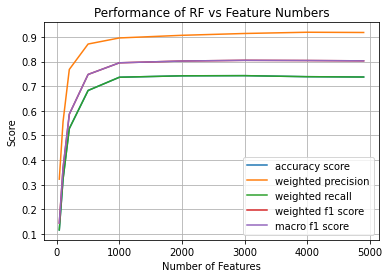

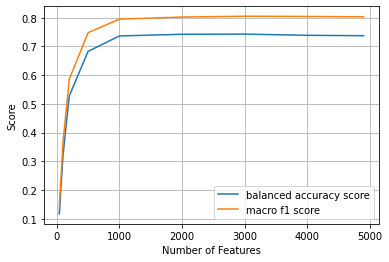

In [6]:
# plot the feature importance graph for random forest
plt.title('Performance of RF vs Feature Numbers')
plt.xlabel('Number of Features')
plt.ylabel('Score')

eval_path = '/content/drive/MyDrive/nlp_datasets/CLINC150/models/evaluation_rf_updated.csv'
eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')

feature_numbers = eval_result['num_features'].to_list()
accuracy_scores = eval_result['accuracy score'].to_list()
balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
weighted_precision = eval_result['weighted precision'].to_list()
weighted_recall = eval_result['weighted recall'].to_list()
weighted_f1_scores = eval_result['weighted f1 score'].to_list()
macro_f1_scores = eval_result['macro f1 score'].to_list()

plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
plt.plot(feature_numbers, weighted_precision, label='weighted precision')
plt.plot(feature_numbers, weighted_recall, label='weighted recall')
plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')
plt.legend()
plt.grid()

plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

plt.legend()
plt.grid()
plt.show()